In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random


In [0]:
base_path = '/content/drive/My Drive/Colab Notebooks/data/train/'


In [0]:
# for img_path in (random.sample(os.listdir(base_path), 6)):
#     img = load_img(os.path.join(base_path,img_path))
#     img = img_to_array(img, dtype=np.uint8)

#     plt.subplot(2, 3,2)
#     plt.imshow(img.squeeze())

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

In [0]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [0]:
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

Found 2103 images belonging to 6 classes.


In [0]:
validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 232 images belonging to 6 classes.


In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [0]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    
    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 37, 37, 32)       

In [0]:
for shloka in range(0,4):
  model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)
  shloka = shloka +4

Epoch 1/20
132/132 [==============================] - 45s 340ms/step - loss: 1.7072 - acc: 0.2430 - val_loss: 1.7068 - val_acc: 0.2069
Epoch 2/20
132/132 [==============================] - 44s 331ms/step - loss: 1.6571 - acc: 0.2446 - val_loss: 1.6537 - val_acc: 0.2802
Epoch 3/20
132/132 [==============================] - 43s 329ms/step - loss: 1.5833 - acc: 0.2969 - val_loss: 1.5928 - val_acc: 0.2629
Epoch 4/20
132/132 [==============================] - 44s 331ms/step - loss: 1.5781 - acc: 0.3157 - val_loss: 1.5779 - val_acc: 0.3190
Epoch 5/20
132/132 [==============================] - 44s 331ms/step - loss: 1.5305 - acc: 0.3389 - val_loss: 1.5956 - val_acc: 0.2414
Epoch 6/20
132/132 [==============================] - 44s 333ms/step - loss: 1.5112 - acc: 0.3432 - val_loss: 1.5519 - val_acc: 0.2759
Epoch 7/20
132/132 [==============================] - 44s 331ms/step - loss: 1.4855 - acc: 0.3613 - val_loss: 1.5538 - val_acc: 0.3017
Epoch 8/20
132/132 [==============================] - 4

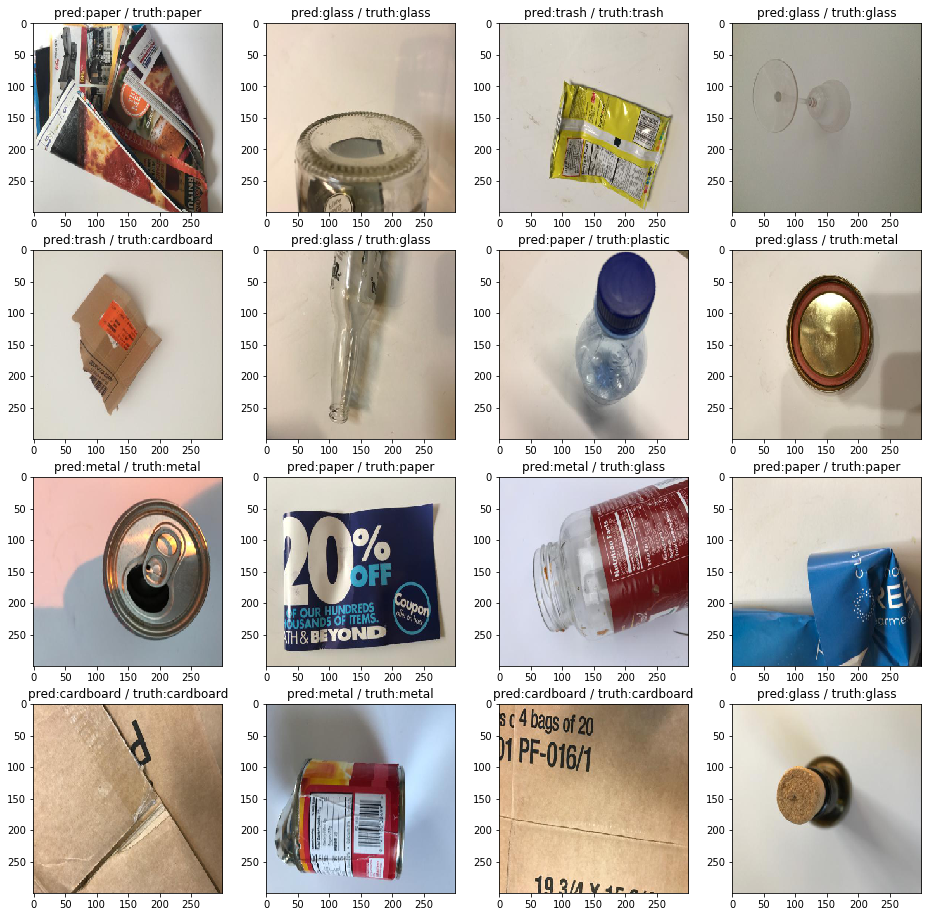

In [0]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])


In [0]:
model.save_weights('/content/drive/My Drive/Colab Notebooks/model_wieghts.h5')
model.save('/content/drive/My Drive/Colab Notebooks/model_keras.h5')

In [0]:
from keras.models import load_model
saved_model = load_model('/content/drive/My Drive/Colab Notebooks/model_keras.h5')

In [0]:
saved_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 37, 37, 32)       

In [0]:
saved_model

In [0]:
# preds= saved_model.predict(test_x)

In [0]:
# plt.figure(figsize=(16, 16))
# for i in range(16):
#     plt.subplot(4, 4, i+1)
#     plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
#     plt.imshow(test_x[i])

In [0]:
# new_image = '/content/drive/My Drive/Colab Notebooks/data/test/'

In [0]:
#  pred = saved_model.predict(new_image)

In [0]:
# # from google.colab.patches import cv2_imshow
# key = cv2. waitKey(1)
# webcam = cv2.VideoCapture(0)
# key = cv2. waitKey(1)
# webcam = cv2.VideoCapture(0)
# while True:
#     try:
#         check, frame = webcam.read()
#         print(check) #prints true as long as the webcam is running
#         print(frame) #prints matrix values of each framecd 
#         cv2.imshow(frame)
#         key = cv2.waitKey(1)
#         if key == ord('s'): 
#             cv2.imwrite(filename='saved_img.jpg', img=frame)
#             webcam.release()
#             img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
#             img_new = cv2.imshow("Captured Image", img_new)
#             cv2.waitKey(1650)
#             cv2.destroyAllWindows()
#             print("Processing image...")
#             img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
#             print("Converting RGB image to grayscale...")
#             gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
#             print("Converted RGB image to grayscale...")
#             print("Resizing image to 28x28 scale...")
#             img_ = cv2.resize(gray,(28,28))
#             print("Resized...")
#             img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
#             print("Image saved!")
        
#             break
#         elif key == ord('q'):
#             print("Turning off camera.")
#             webcam.release()
#             print("Camera off.")
#             print("Program ended.")
#             cv2.destroyAllWindows()
#             break
        
#     except(KeyboardInterrupt):
#         print("Turning off camera.")
#         webcam.release()
#         print("Camera off.")
#         print("Program ended.")
#         cv2.destroyAllWindows()
#         break


In [0]:
import cv2
from keras.preprocessing import image
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/data/test/plastic26.jpg')
# print(img)
img = cv2.resize(img,(300,300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [0]:
images = np.vstack([x])
classes = saved_model.predict_classes(images, batch_size=10)
print(classes)
if classes == 0:
  print("cardboard")
elif classes == 1:
  print("glass")
elif classes == 2:
  print("metal")
elif classes == 3:
  print("paper")
elif classes == 4:
  print("plastic")
elif classes == 5:
  print("trash")

[4]
plastic
